In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib
import matplotlib.pyplot as plt

phones = pd.read_csv('1.8_phones.csv')

In [35]:
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


## Задача регрессии

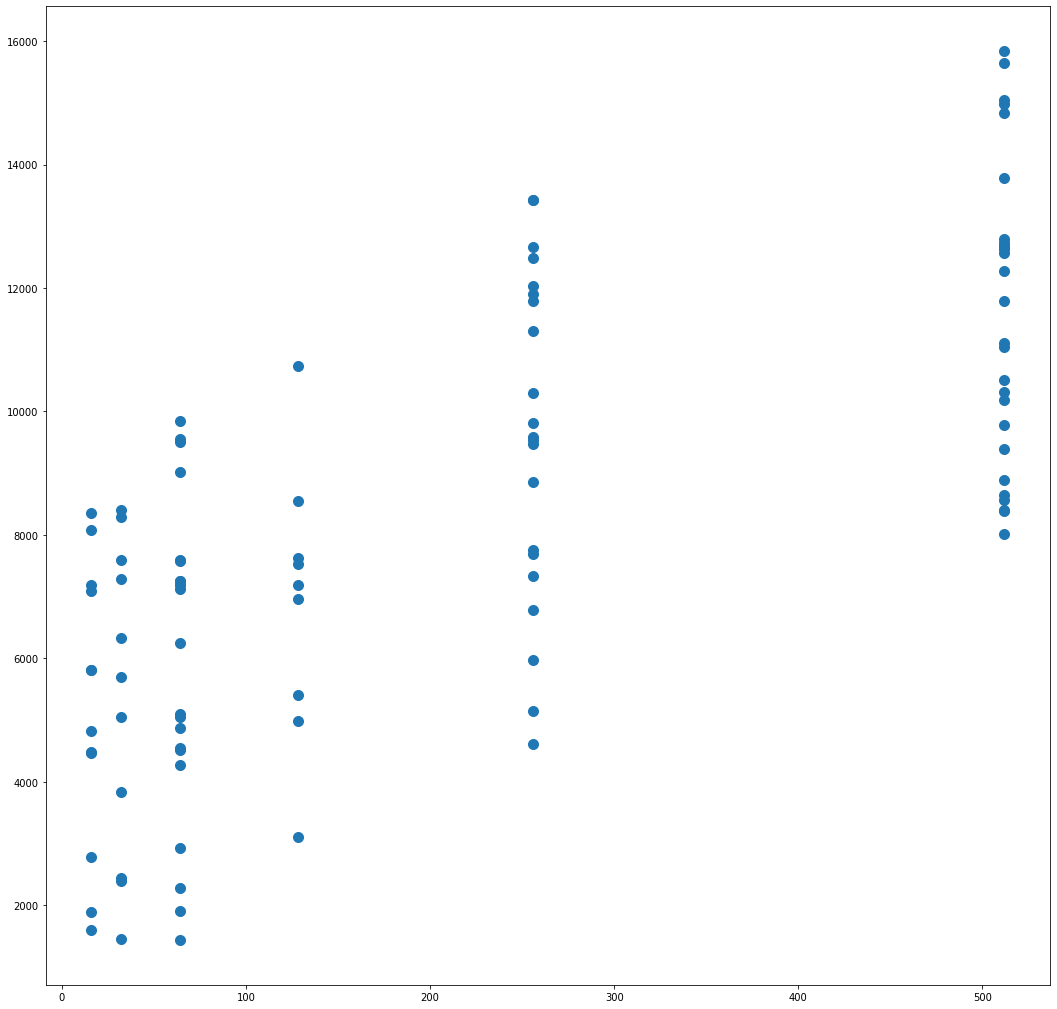

In [7]:
fig = plt.figure(figsize=(18,18))
ax = plt.axes()

ax.scatter(phones['disk'], phones['price'], s=100)

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = phones[['disk']]
y = phones['price']

reg = LinearRegression().fit(X, y)

In [11]:
reg.predict(X[0:1])[0]

6120.265447090668

In [12]:
[b] = reg.coef_
a = reg.intercept_

def reg_prediction(disk):
    return a + b * disk 

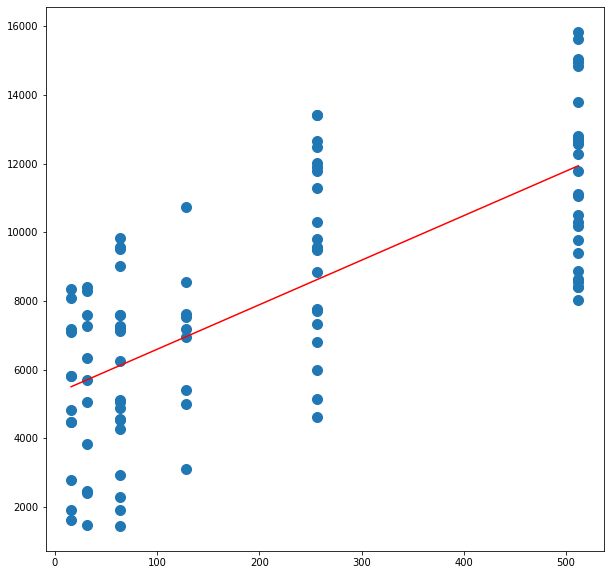

In [14]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.scatter(phones['disk'], phones['price'], s=100)

ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c='red')

plt.show()

## Задача Классификации

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [22]:
X = phones[['disk']]
y = phones['os']

cl = DecisionTreeClassifier().fit(X, y)

In [23]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [37]:
cl.predict(X[7:8])[0], y[7]

('Android', 'Android')

## Задача Кластеризации

In [38]:
from sklearn.cluster import KMeans

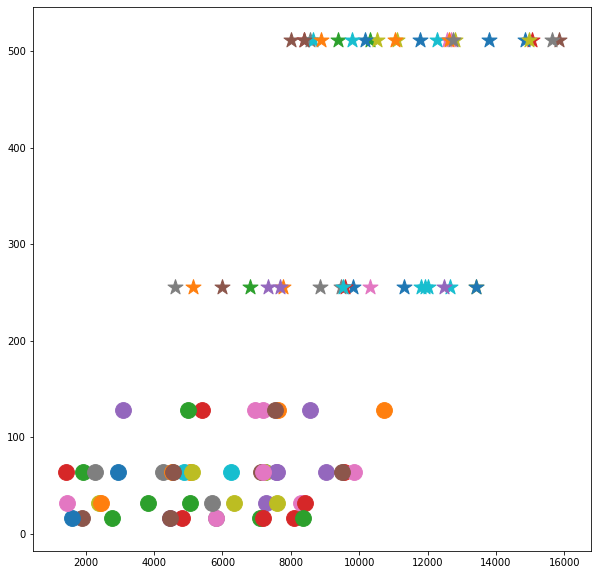

In [41]:
fig = plt.figure(figsize=(10,10))
markers = {'Android':'o', 'iOS':'*'}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker = markers[l])
    
plt.show()

In [42]:
X = phones[['price', 'disk']]

clust = KMeans(n_clusters=2).fit(X)

In [44]:
[c1, c2] = clust.cluster_centers_

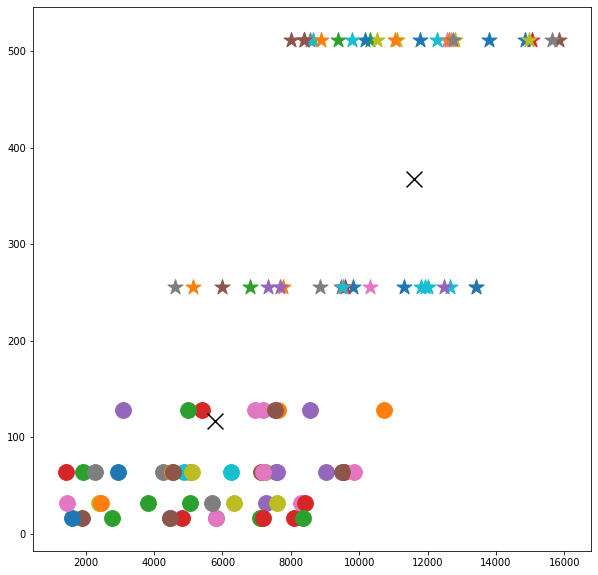

In [49]:
fig = plt.figure(figsize=(10,10))

markers = {'Android':'o', 'iOS':'*'}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker = markers[l])

plt.scatter(c1[0], c1[1], s=250, marker = 'x', c='black')
#plt.scatter(c1[0], c1[1], s=250 * 5e2, c='black', alpha = 0.1)

plt.scatter(c2[0], c2[1], s=250, marker = 'x', c='black')
#plt.scatter(c2[0], c2[1], s=250 * 2e3, c='black', alpha = 0.1)

#plt.scatter(c3[0], c3[1], s=250, marker = 'x', c='black')
#plt.scatter(c3[0], c3[1], s=250 * 2.5e2, c='black', alpha = 0.1)

plt.show()